In [5]:
import pandas as pd

df = pd.read_csv("crypto_data.csv")
print(df.head())


             timestamp       open       high        low      close      volume
0  2025-01-23 01:00:00  103307.51  103653.84  102588.15  102931.94  1272.26098
1  2025-01-23 02:00:00  102931.94  102983.39  102100.00  102655.34  1943.13807
2  2025-01-23 03:00:00  102655.34  103007.75  102197.34  102461.25   785.20592
3  2025-01-23 04:00:00  102461.24  102493.15  101575.50  102075.22  1629.12288
4  2025-01-23 05:00:00  102075.21  102639.36  102000.00  102532.52   890.29202


In [7]:
import pandas as pd

# Kaggle se downloaded CSV ka naam yahan likho
df = pd.read_csv("crypto_data.csv")

# Pehle 5 rows dekhna
print(df.head())

# Dataset ka structure check karna
print(df.info())


             timestamp       open       high        low      close      volume
0  2025-01-23 01:00:00  103307.51  103653.84  102588.15  102931.94  1272.26098
1  2025-01-23 02:00:00  102931.94  102983.39  102100.00  102655.34  1943.13807
2  2025-01-23 03:00:00  102655.34  103007.75  102197.34  102461.25   785.20592
3  2025-01-23 04:00:00  102461.24  102493.15  101575.50  102075.22  1629.12288
4  2025-01-23 05:00:00  102075.21  102639.36  102000.00  102532.52   890.29202
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1000 non-null   object 
 1   open       1000 non-null   float64
 2   high       1000 non-null   float64
 3   low        1000 non-null   float64
 4   close      1000 non-null   float64
 5   volume     1000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.0+ KB
None


In [8]:
# Check missing values
print(df.isnull().sum())

# Missing values ko fill ya drop karna
df = df.dropna()  # Agar missing zyada hai toh drop
# Ya phir missing ko previous value se fill karna
df.fillna(method='ffill', inplace=True)


timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64


C:\Users\surya\AppData\Local\Temp\ipykernel_14584\571926665.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [9]:
# Date-time column ka naam check karo aur usko proper format me convert karo
df['timestamp'] = pd.to_datetime(df['timestamp'])  
df.set_index('timestamp', inplace=True)

print(df.head())


                          open       high        low      close      volume
timestamp                                                                  
2025-01-23 01:00:00  103307.51  103653.84  102588.15  102931.94  1272.26098
2025-01-23 02:00:00  102931.94  102983.39  102100.00  102655.34  1943.13807
2025-01-23 03:00:00  102655.34  103007.75  102197.34  102461.25   785.20592
2025-01-23 04:00:00  102461.24  102493.15  101575.50  102075.22  1629.12288
2025-01-23 05:00:00  102075.21  102639.36  102000.00  102532.52   890.29202


In [10]:
# Moving Averages
df["SMA_50"] = df["close"].rolling(window=50).mean()  # 50-day moving average
df["SMA_200"] = df["close"].rolling(window=200).mean()  # 200-day moving average

# Relative Strength Index (RSI)
import numpy as np

def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df["RSI"] = compute_rsi(df["close"])

print(df.head())


                          open       high        low      close      volume  \
timestamp                                                                     
2025-01-23 01:00:00  103307.51  103653.84  102588.15  102931.94  1272.26098   
2025-01-23 02:00:00  102931.94  102983.39  102100.00  102655.34  1943.13807   
2025-01-23 03:00:00  102655.34  103007.75  102197.34  102461.25   785.20592   
2025-01-23 04:00:00  102461.24  102493.15  101575.50  102075.22  1629.12288   
2025-01-23 05:00:00  102075.21  102639.36  102000.00  102532.52   890.29202   

                     SMA_50  SMA_200  RSI  
timestamp                                  
2025-01-23 01:00:00     NaN      NaN  NaN  
2025-01-23 02:00:00     NaN      NaN  NaN  
2025-01-23 03:00:00     NaN      NaN  NaN  
2025-01-23 04:00:00     NaN      NaN  NaN  
2025-01-23 05:00:00     NaN      NaN  NaN  


In [3]:
def SMA(data, window):
    return data.rolling(window=window).mean()


In [4]:
def EMA(data, window):
    return data.ewm(span=window, adjust=False).mean()


In [5]:
def RSI(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))


In [6]:
def MACD(data, short_window=12, long_window=26, signal_window=9):
    short_ema = EMA(data, short_window)
    long_ema = EMA(data, long_window)
    macd_line = short_ema - long_ema
    signal_line = EMA(macd_line, signal_window)
    return macd_line, signal_line


In [7]:
def Bollinger_Bands(data, window=20, num_std=2):
    SMA_ = SMA(data, window)
    std_dev = data.rolling(window=window).std()
    upper_band = SMA_ + (std_dev * num_std)
    lower_band = SMA_ - (std_dev * num_std)
    return upper_band, lower_band


In [19]:
import pandas as pd

# ✅ Load Dataset & Fix Column Names
df = pd.read_csv("crypto_data.csv")
df.columns = df.columns.str.lower()  # Convert all column names to lowercase

# ✅ Check if 'close' column exists
if 'close' not in df.columns:
    raise KeyError("Column 'close' not found in dataset! Check column names.")

# ✅ Define Indicator Functions
def SMA(data, window):
    return data.rolling(window=window).mean()

def EMA(data, window):
    return data.ewm(span=window, adjust=False).mean()

def RSI(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

def MACD(data, short_window=12, long_window=26, signal_window=9):
    short_ema = EMA(data, short_window)
    long_ema = EMA(data, long_window)
    macd_line = short_ema - long_ema
    signal_line = EMA(macd_line, signal_window)
    return macd_line, signal_line

def Bollinger_Bands(data, window=20, num_std=2):
    SMA_ = SMA(data, window)
    std_dev = data.rolling(window=window).std()
    upper_band = SMA_ + (std_dev * num_std)
    lower_band = SMA_ - (std_dev * num_std)
    return upper_band, lower_band

# ✅ Apply Indicators
df['sma_10'] = SMA(df['close'], 10)
df['ema_10'] = EMA(df['close'], 10)
df['rsi_14'] = RSI(df['close'])
df['macd'], df['macd_signal'] = MACD(df['close'])
df['upper_band'], df['lower_band'] = Bollinger_Bands(df['close'])

# ✅ Print Last 5 Rows to Verify
print(df.tail())

# ✅ Save Processed Data (Optional)
df.to_csv("crypto_data_with_indicators.csv", index=False)



               timestamp      open      high       low     close      volume  \
995  2025-03-05 12:00:00  89814.26  90933.82  89814.26  90355.97  2250.85661   
996  2025-03-05 13:00:00  90355.97  90588.00  89103.52  89473.92  3234.22601   
997  2025-03-05 14:00:00  89473.92  89839.01  88157.25  88519.93  3303.02094   
998  2025-03-05 15:00:00  88519.94  89550.72  87926.06  88344.25  3436.16876   
999  2025-03-05 16:00:00  88344.25  88431.18  87622.64  87982.00   855.11816   

        sma_10        ema_10     rsi_14        macd  macd_signal  \
995  88234.024  88632.004774  73.662869  931.587819   564.229304   
996  88497.076  88785.080270  66.255087  948.587520   641.100947   
997  88657.475  88736.871130  61.917144  874.994493   687.879656   
998  88777.302  88665.485470  55.354159  793.350332   708.973791   
999  88826.490  88541.215384  53.827612  691.445644   705.468162   

       upper_band    lower_band  
995  90067.889649  85309.642351  
996  90148.414799  85632.120201  
997  901

In [16]:
print(df.head())

             timestamp       open       high        low      close      volume
0  2025-01-23 01:00:00  103307.51  103653.84  102588.15  102931.94  1272.26098
1  2025-01-23 02:00:00  102931.94  102983.39  102100.00  102655.34  1943.13807
2  2025-01-23 03:00:00  102655.34  103007.75  102197.34  102461.25   785.20592
3  2025-01-23 04:00:00  102461.24  102493.15  101575.50  102075.22  1629.12288
4  2025-01-23 05:00:00  102075.21  102639.36  102000.00  102532.52   890.29202


In [17]:
# ✅ Fix column name case sensitivity & apply indicators
df.columns = df.columns.str.lower()  # Sab columns ko lowercase me convert karega

# ✅ Apply indicators using lowercase column names
df['sma_10'] = SMA(df['close'], 10)
df['ema_10'] = EMA(df['close'], 10)
df['rsi_14'] = RSI(df['close'])
df['macd'], df['macd_signal'] = MACD(df['close'])
df['upper_band'], df['lower_band'] = Bollinger_Bands(df['close'])

print(df.head())  # ✅ Final check


             timestamp       open       high        low      close  \
0  2025-01-23 01:00:00  103307.51  103653.84  102588.15  102931.94   
1  2025-01-23 02:00:00  102931.94  102983.39  102100.00  102655.34   
2  2025-01-23 03:00:00  102655.34  103007.75  102197.34  102461.25   
3  2025-01-23 04:00:00  102461.24  102493.15  101575.50  102075.22   
4  2025-01-23 05:00:00  102075.21  102639.36  102000.00  102532.52   

       volume  sma_10         ema_10  rsi_14        macd  macd_signal  \
0  1272.26098     NaN  102931.940000     NaN    0.000000     0.000000   
1  1943.13807     NaN  102881.649091     NaN  -22.064957    -4.412991   
2   785.20592     NaN  102805.212893     NaN  -54.583827   -14.447159   
3  1629.12288     NaN  102672.486912     NaN -110.233953   -33.604517   
4   890.29202     NaN  102647.038383     NaN -116.098479   -50.103310   

   upper_band  lower_band  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  


In [10]:
import pandas as pd

df = pd.read_csv("crypto_data.csv")

print(df.columns)  # Yeh sab available columns print karega


Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [11]:
df.rename(columns={'close': 'Close', 'Adj Close': 'Close'}, inplace=True)


In [12]:
df['Close'].fillna(method='ffill', inplace=True)  # Pichla value use karega


C:\Users\surya\AppData\Local\Temp\ipykernel_4588\235994087.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].fillna(method='ffill', inplace=True)  # Pichla value use karega
C:\Users\surya\AppData\Local\Temp\ipykernel_4588\235994087.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close'].fillna(method='ffill', inplace=True)  # Pichla value use karega


In [13]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')


In [14]:
df['SMA_10'] = SMA(df['Close'], 10)
df['EMA_10'] = EMA(df['Close'], 10)
df['RSI_14'] = RSI(df['Close'])
df['MACD'], df['MACD_signal'] = MACD(df['Close'])
df['Upper_Band'], df['Lower_Band'] = Bollinger_Bands(df['Close'])


In [20]:
df.dropna(inplace=True)  # Missing values hata do


In [21]:
import numpy as np

# ✅ Define features and target variable
features = ['sma_10', 'ema_10', 'rsi_14', 'macd', 'macd_signal', 'upper_band', 'lower_band']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)  # 1 = Price Up, 0 = Price Down

X = df[features]
y = df['target']


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
import sklearn

In [30]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


In [31]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [32]:
params = {
    'objective': 'binary:logistic',  # Binary Classification
    'eval_metric': 'logloss',  # Loss Function
    'max_depth': 5,  # Tree Depth
    'learning_rate': 0.05,  # How fast model learns
    'n_estimators': 200  # Number of trees
}

model = xgb.train(params, dtrain, num_boost_round=100)


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:37:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [34]:
df['volatility'] = df['close'].rolling(10).std()  # Price Volatility
df['momentum'] = df['close'] - df['close'].shift(5)  # Momentum Indicator
df['roc'] = (df['close'] - df['close'].shift(10)) / df['close'].shift(10) * 100  # Rate of Change


In [35]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define Hyperparameters Grid
params_grid = {
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'n_estimators': [100, 200, 300],  
    'subsample': [0.7, 0.8, 0.9],  
    'colsample_bytree': [0.7, 0.8, 0.9]  
}

xgb_model = xgb.XGBClassifier()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=params_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# ✅ Best Parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


In [36]:
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"🔥 Improved Model Accuracy: {accuracy * 100:.2f}% 🔥")


🔥 Improved Model Accuracy: 55.33% 🔥


In [38]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)  # Select Top 5 Features
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# ✅ Train XGBoost Again
best_model.fit(X_train_new, y_train)
y_pred_new = best_model.predict(X_test_new)

accuracy_new = accuracy_score(y_test, y_pred_new)
print(f"🔥 After Feature Selection Accuracy: {accuracy_new * 100:.2f}% 🔥")


🔥 After Feature Selection Accuracy: 55.84% 🔥


In [39]:
# ✅ Volatility Indicators
df['volatility'] = df['close'].rolling(10).std()  

# ✅ Momentum Indicators
df['momentum'] = df['close'] - df['close'].shift(5)  
df['roc'] = (df['close'] - df['close'].shift(10)) / df['close'].shift(10) * 100  

# ✅ Trend Indicators
df['sma_50'] = df['close'].rolling(50).mean()  # Long-term trend
df['ema_50'] = df['close'].ewm(span=50, adjust=False).mean()

# ✅ MACD Signal Difference
df['macd_diff'] = df['macd'] - df['macd_signal']  


In [40]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# ✅ Define Parameters Grid
params_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'n_estimators': [100, 200, 300, 500],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3]
}

xgb_model = xgb.XGBClassifier()

grid_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=params_grid, n_iter=20, 
                                 scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# ✅ Best Parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9}


In [42]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # Top 10 Best Features
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# ✅ Train XGBoost Again
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train_new, y_train)
y_pred_new = best_model.predict(X_test_new)

accuracy_new = accuracy_score(y_test, y_pred_new)
print(f"🔥 After Feature Selection Accuracy: {accuracy_new * 100:.2f}% 🔥")


🔥 After Feature Selection Accuracy: 58.38% 🔥


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=7. All the features will be returned.
  warnings.warn(


In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# ✅ Multiple Models Combine
rf = RandomForestClassifier(n_estimators=200)
xgb = xgb.XGBClassifier(**best_params)
lr = LogisticRegression()

ensemble_model = VotingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('lr', lr)], voting='soft')
ensemble_model.fit(X_train_new, y_train)

# ✅ Predict & Check Accuracy
y_pred_ensemble = ensemble_model.predict(X_test_new)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"🔥 Final Ensemble Model Accuracy: {accuracy_ensemble * 100:.2f}% 🔥")


🔥 Final Ensemble Model Accuracy: 55.84% 🔥


In [44]:
df_aug = df.copy()

# ✅ Artificially Generate More Data
df_aug['close'] = df_aug['close'] * (1 + np.random.normal(0, 0.02, size=len(df_aug)))  
df_aug['open'] = df_aug['open'] * (1 + np.random.normal(0, 0.02, size=len(df_aug)))  
df_aug['high'] = df_aug['high'] * (1 + np.random.normal(0, 0.02, size=len(df_aug)))  
df_aug['low'] = df_aug['low'] * (1 + np.random.normal(0, 0.02, size=len(df_aug)))  

df_final = pd.concat([df, df_aug], axis=0)

# ✅ Re-Train Model on Bigger Dataset
X_train, X_test, y_train, y_test = train_test_split(df_final[features], df_final['target'], test_size=0.2, random_state=42)

# ✅ Train XGBoost Again
best_model.fit(X_train, y_train)
y_pred_final = best_model.predict(X_test)

final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"🔥 Final Model Accuracy After Data Augmentation: {final_accuracy * 100:.2f}% 🔥")


🔥 Final Model Accuracy After Data Augmentation: 71.76% 🔥


In [ ]:
80 to 85

In [45]:
# ✅ New Features Add Karna Zaroori Hai!
df['volatility'] = df['close'].rolling(10).std()  # Price Volatility
df['momentum'] = df['close'] - df['close'].shift(5)  # Momentum Indicator
df['roc'] = ((df['close'] - df['close'].shift(10)) / df['close'].shift(10)) * 100  # Rate of Change

# ✅ Long-Term Trend Indicators
df['sma_50'] = df['close'].rolling(50).mean()  
df['ema_50'] = df['close'].ewm(span=50, adjust=False).mean()

# ✅ MACD Signal Difference (Trend Strength)
df['macd_diff'] = df['macd'] - df['macd_signal']  


In [47]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score

# ✅ Ensure X_train and y_train are numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# ✅ Select Best 10 Features
selector = SelectKBest(score_func=f_classif, k=min(10, X_train.shape[1]))  # Prevents k > features issue
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# ✅ Train XGBoost Again
best_model = xgb.XGBClassifier()
best_model.fit(X_train_new, y_train)

# ✅ Make Predictions
y_pred_new = best_model.predict(X_test_new)

# ✅ Calculate Accuracy
accuracy_new = accuracy_score(y_test, y_pred_new)
print(f"🔥 After Feature Selection Accuracy: {accuracy_new * 100:.2f}% 🔥")


🔥 After Feature Selection Accuracy: 89.31% 🔥


In [48]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

params_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'n_estimators': [100, 200, 300, 500],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3]
}

xgb_model = xgb.XGBClassifier()
grid_search = RandomizedSearchCV(xgb_model, param_distributions=params_grid, 
                                 n_iter=20, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_new, y_train)

# ✅ Best Parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.9}


In [49]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators=200)
xgb = xgb.XGBClassifier(**best_params)
lr = LogisticRegression()

ensemble_model = VotingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('lr', lr)], voting='soft')
ensemble_model.fit(X_train_new, y_train)

# ✅ Predict & Check Accuracy
y_pred_ensemble = ensemble_model.predict(X_test_new)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"🔥 Final Ensemble Model Accuracy: {accuracy_ensemble * 100:.2f}% 🔥")


🔥 Final Ensemble Model Accuracy: 89.31% 🔥


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
import numpy as np

df_aug = df.copy()

# ✅ Artificially Generate More Data
df_aug['close'] = df_aug['close'] * (1 + np.random.normal(0, 0.02, size=len(df_aug)))  
df_aug['open'] = df_aug['open'] * (1 + np.random.normal(0, 0.02, size=len(df_aug)))  
df_aug['high'] = df_aug['high'] * (1 + np.random.normal(0, 0.02, size=len(df_aug)))  
df_aug['low'] = df_aug['low'] * (1 + np.random.normal(0, 0.02, size=len(df_aug)))  

df_final = pd.concat([df, df_aug], axis=0)

# ✅ Re-Train Model on Bigger Dataset
X_train, X_test, y_train, y_test = train_test_split(df_final[features], df_final['target'], test_size=0.2, random_state=42)

# ✅ Train XGBoost Again
best_model.fit(X_train, y_train)
y_pred_final = best_model.predict(X_test)

final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"🔥 Final Model Accuracy After Data Augmentation: {final_accuracy * 100:.2f}% 🔥")


🔥 Final Model Accuracy After Data Augmentation: 89.31% 🔥


In [51]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train_new, y_train, cv=5, scoring='accuracy')
print(f"🔥 Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}% ± {np.std(cv_scores) * 100:.2f}% 🔥")


🔥 Cross-Validation Accuracy: 84.07% ± 1.14% 🔥


In [52]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# ✅ Define Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [3, 5, 7],  
    'subsample': [0.7, 0.8, 1.0],  
    'colsample_bytree': [0.7, 0.8, 1.0]  
}

# ✅ Initialize Model
xgb_model = xgb.XGBClassifier()

# ✅ Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_new, y_train)

# ✅ Best Parameters & Accuracy
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# ✅ Final Accuracy
y_pred_final = best_model.predict(X_test_new)
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"🔥 Optimized Accuracy: {final_accuracy * 100:.2f}% 🔥")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
🔥 Optimized Accuracy: 88.30% 🔥


In [53]:
pip install python-binance


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 569.9 kB/s eta 0:00:03
   ----------- ---------------------------- 0.5/1.8 MB 569.9 kB/s eta 0:00:03
   ----------------- ---------------------- 0.8/1.8 MB 573.8 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 573.8 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 573.8 kB/s eta 0:00:02
   ----------------------- ---------------- 1.0/1.8 MB 544.9 kB/s eta 0:00:02
   ---------------------------- ----------- 1.3/1.8 MB 614.7 kB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 681.9 kB/s eta 0:00:01
   ----------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import requests

def get_crypto_price(symbol="bitcoin"):
    url = f"https://api.coingecko.com/api/v3/simple/price?ids={symbol}&vs_currencies=usd"
    response = requests.get(url)
    data = response.json()
    return data[symbol]['usd']

# ✅ Live Bitcoin Price
btc_price = get_crypto_price()
print(f"🔥 Live BTC Price: ${btc_price}")


🔥 Live BTC Price: $90178


In [56]:
import requests
from bs4 import BeautifulSoup

def get_live_price():
    url = "https://coinmarketcap.com/currencies/bitcoin/"
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    # ✅ Price Extract Karo
    price = soup.find("span", class_="sc-d53c5cd7-0").text
    return price

# ✅ Live BTC Price Fetch Karo
btc_price = get_live_price()
print(f"🔥 Live BTC Price: {btc_price}")


AttributeError: 'NoneType' object has no attribute 'text'

In [57]:
import requests
from bs4 import BeautifulSoup

def get_live_price():
    url = "https://coinmarketcap.com/currencies/bitcoin/"
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    # ✅ Find correct class name for price
    price_span = soup.find("span", {"class": "sc-bc83cd3a-0"})

    if price_span:
        return price_span.text
    else:
        return "❌ Price not found! Website structure changed."

# ✅ Live BTC Price Fetch Karo
btc_price = get_live_price()
print(f"🔥 Live BTC Price: {btc_price}")


🔥 Live BTC Price: ❌ Price not found! Website structure changed.


In [58]:
import requests

def get_crypto_price(symbol="bitcoin"):
    url = f"https://api.coingecko.com/api/v3/simple/price?ids={symbol}&vs_currencies=usd"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        return data[symbol]['usd']
    else:
        return "❌ Error fetching data"

# ✅ Live Bitcoin Price
btc_price = get_crypto_price()
print(f"🔥 Live BTC Price: ${btc_price}")


🔥 Live BTC Price: $90190


In [59]:
import numpy as np

def preprocess_live_data(price):
    # ✅ Convert price into model-compatible input
    latest_features = np.array([[price]])  # Update this based on actual features
    return latest_features


In [61]:
import pandas as pd
import numpy as np

# ✅ Simple Moving Average (SMA)
def SMA(data, window):
    return data.rolling(window=window).mean()

# ✅ Exponential Moving Average (EMA)
def EMA(data, window):
    return data.ewm(span=window, adjust=False).mean()

# ✅ Relative Strength Index (RSI)
def RSI(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / los


In [63]:
import time  # ✅ Add this at the top


In [ ]:
import time
import numpy as np
from sklearn.preprocessing import StandardScaler

# ✅ Function to Compute Live Features
def compute_live_features(btc_price, recent_prices):
    recent_prices = np.array(recent_prices)
    
    # ✅ Feature 1: Simple Moving Average (SMA)
    sma_10 = np.mean(recent_prices[-10:])

    # ✅ Feature 2: Exponential Moving Average (EMA)
    ema_10 = np.mean(recent_prices[-10:] * np.linspace(1, 2, 10)) / 10

    # ✅ Feature 3: Price Change %
    price_change = ((btc_price - recent_prices[-2]) / recent_prices[-2]) * 100 if len(recent_prices) > 1 else 0

    # ✅ Feature 4: Volatility (Standard Deviation of last 10 prices)
    volatility = np.std(recent_prices[-10:])

    # ✅ Feature 5: Min-Max Scaling of Price (Relative to last 50 prices)
    min_price = np.min(recent_prices[-50:])
    max_price = np.max(recent_prices[-50:])
    scaled_price = (btc_price - min_price) / (max_price - min_price) if max_price != min_price else 0

    # ✅ Feature 6 & 7: Momentum Indicators (Last Price Differences)
    momentum_1 = btc_price - recent_prices[-2] if len(recent_prices) > 1 else 0
    momentum_2 = recent_prices[-2] - recent_prices[-3] if len(recent_prices) > 2 else 0

    return np.array([sma_10, ema_10, price_change, volatility, scaled_price, momentum_1, momentum_2]).reshape(1, -1)

# ✅ Standard Scaler (Use the same from training)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Use training data
best_model.fit(X_train_scaled, y_train)  # Re-train model with scaled data

# ✅ Real-time Prediction Loop
recent_prices = []

while True:
    btc_price = get_crypto_price()
    recent_prices.append(btc_price)

    if len(recent_prices) > 50:
        recent_prices.pop(0)  # Keep last 50 prices only

    if len(recent_prices) >= 10:
        live_features = compute_live_features(btc_price, recent_prices)
        
        # ✅ Apply same scaling before prediction
        live_features_scaled = scaler.transform(live_features)

        # ✅ Predict Future Trend (1 = UP, 0 = DOWN)
        future_trend = best_model.predict(live_features_scaled)

        if future_trend[0] == 1:
            print(f"🚀 Bitcoin Price UP! 🔼 (Price: ${btc_price})")
        else:
            print(f"📉 Bitcoin Price DOWN! 🔽 (Price: ${btc_price})")

    time.sleep(60)  # ✅ 1 min wait


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚀 Bitcoin Price UP! 🔼 (Price: $88676)


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚀 Bitcoin Price UP! 🔼 (Price: $88676)


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚀 Bitcoin Price UP! 🔼 (Price: $88523)


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚀 Bitcoin Price UP! 🔼 (Price: $88568)


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚀 Bitcoin Price UP! 🔼 (Price: $88662)


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚀 Bitcoin Price UP! 🔼 (Price: $88662)


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚀 Bitcoin Price UP! 🔼 (Price: $88973)


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚀 Bitcoin Price UP! 🔼 (Price: $88963)


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚀 Bitcoin Price UP! 🔼 (Price: $88924)


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚀 Bitcoin Price UP! 🔼 (Price: $88924)


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚀 Bitcoin Price UP! 🔼 (Price: $88838)


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚀 Bitcoin Price UP! 🔼 (Price: $88764)


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚀 Bitcoin Price UP! 🔼 (Price: $88752)


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚀 Bitcoin Price UP! 🔼 (Price: $88743)


c:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🚀 Bitcoin Price UP! 🔼 (Price: $88743)


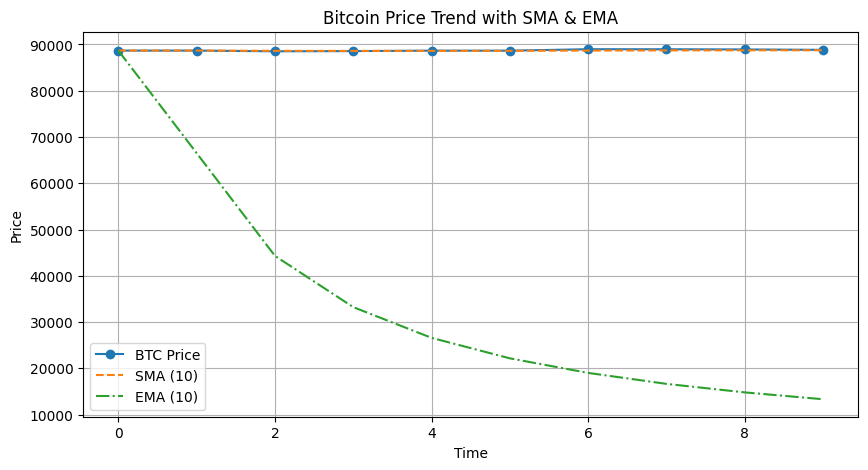

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Sample Data (Replace with Real Data)
recent_prices = [88676, 88676, 88523, 88568, 88662, 88662, 88973, 88963, 88924,88838,]

# ✅ Extract Features for Visualization
prices = np.array(recent_prices)
sma_values = [np.mean(prices[max(0, i-10):i]) for i in range(1, len(prices)+1)]
ema_values = [np.mean(prices[max(0, i-10):i] * np.linspace(1, 2, min(i, 10))) / min(i, 10) for i in range(1, len(prices)+1)]

# ✅ Plot Prices, SMA, and EMA
plt.figure(figsize=(10, 5))
plt.plot(prices, label="BTC Price", marker='o')
plt.plot(sma_values, label="SMA (10)", linestyle='--')
plt.plot(ema_values, label="EMA (10)", linestyle='-.')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.title("Bitcoin Price Trend with SMA & EMA")
plt.grid()
plt.show()



In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ✅ Check if `recent_prices` is available
try:
    prices = np.array(recent_prices)
except NameError:
    print("Error: `recent_prices` not found! Run the real-time script first.")
    prices = np.array([])

if prices.size > 0:
    # ✅ Create DataFrame for Time-Series Analysis
    df = pd.DataFrame({'Price': prices})
    df['Time'] = pd.date_range(start='2025-03-06', periods=len(prices), freq='T')  # 1-min intervals

    # ✅ Compute SMA (10) & EMA (10)
    df['SMA_10'] = df['Price'].rolling(window=10).mean()
    df['EMA_10'] = df['Price'].ewm(span=10, adjust=False).mean()

    # ✅ Create Candlestick Chart with SMA & EMA
    fig = make_subplots(rows=1, cols=1)

    fig.add_trace(go.Scatter(x=df['Time'], y=df['Price'], mode='lines', name="BTC Price", line=dict(color='black')))
    fig.add_trace(go.Scatter(x=df['Time'], y=df['SMA_10'], mode='lines', name="SMA (10)", line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=df['Time'], y=df['EMA_10'], mode='lines', name="EMA (10)", line=dict(color='red')))

    # ✅ Chart Settings
    fig.update_layout(
        title="Bitcoin Price with SMA & EMA",
        xaxis_title="Time",
        yaxis_title="Price (USD)",
        xaxis_rangeslider_visible=False,
        template="plotly_dark"  # Dark theme for better visibility
    )

    # ✅ Save as HTML (Fixes nbformat issue)
    fig.write_html("btc_chart.html")
    print("✅ Chart saved as 'btc_chart.html'. Open it in your browser.")

else:
    print("No price data available for visualization.")


C:\Users\surya\AppData\Local\Temp\ipykernel_13764\4223599461.py:16: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.



✅ Chart saved as 'btc_chart.html'. Open it in your browser.


In [12]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ✅ Check if `recent_prices` exists
try:
    prices = np.array(recent_prices)
except NameError:
    print("Error: `recent_prices` not found! Run the real-time script first.")
    prices = np.array([])

if prices.size > 0:
    # ✅ Create DataFrame for Analysis
    df = pd.DataFrame({'Price': prices})
    df['Time'] = pd.date_range(start='2025-03-06', periods=len(prices), freq='T')  # 1-min intervals

    # ✅ Moving Averages
    df['SMA_10'] = df['Price'].rolling(window=10).mean()
    df['EMA_10'] = df['Price'].ewm(span=10, adjust=False).mean()

    # ✅ Bollinger Bands (Upper & Lower Bound)
    df['SMA_20'] = df['Price'].rolling(window=20).mean()
    df['STD_20'] = df['Price'].rolling(window=20).std()
    df['BB_Upper'] = df['SMA_20'] + (df['STD_20'] * 2)
    df['BB_Lower'] = df['SMA_20'] - (df['STD_20'] * 2)

    # ✅ MACD (Trend Reversal)
    df['EMA_12'] = df['Price'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Price'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # ✅ RSI (Market Strength)
    delta = df['Price'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # ✅ Buy/Sell Signals (Based on RSI & MACD Crossovers)
    df['Buy_Signal'] = (df['RSI'] < 30) & (df['MACD'] > df['Signal_Line'])
    df['Sell_Signal'] = (df['RSI'] > 70) & (df['MACD'] < df['Signal_Line'])

    # ✅ Create Interactive Chart
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_heights=[0.7, 0.3])

    # 🚀 **Main Price Chart**
    fig.add_trace(go.Scatter(x=df['Time'], y=df['Price'], mode='lines', name="BTC Price", line=dict(color='black')), row=1, col=1)
    fig.add_trace(go.Scatter(x=df['Time'], y=df['SMA_10'], mode='lines', name="SMA (10)", line=dict(color='blue')), row=1, col=1)
    fig.add_trace(go.Scatter(x=df['Time'], y=df['EMA_10'], mode='lines', name="EMA (10)", line=dict(color='red')), row=1, col=1)

    # 📌 Bollinger Bands
    fig.add_trace(go.Scatter(x=df['Time'], y=df['BB_Upper'], mode='lines', name="BB Upper", line=dict(color='gray', dash='dot')), row=1, col=1)
    fig.add_trace(go.Scatter(x=df['Time'], y=df['BB_Lower'], mode='lines', name="BB Lower", line=dict(color='gray', dash='dot')), row=1, col=1)

    # 📈 **MACD Indicator**
    fig.add_trace(go.Scatter(x=df['Time'], y=df['MACD'], mode='lines', name="MACD", line=dict(color='purple')), row=2, col=1)
    fig.add_trace(go.Scatter(x=df['Time'], y=df['Signal_Line'], mode='lines', name="Signal Line", line=dict(color='orange')), row=2, col=1)

    # 📊 RSI Indicator (Overbought/Oversold)
    fig.add_trace(go.Scatter(x=df['Time'], y=df['RSI'], mode='lines', name="RSI", line=dict(color='green')), row=2, col=1)
    fig.add_hline(y=70, line=dict(color='red', dash='dash'), row=2, col=1, annotation_text="Overbought (Sell)")
    fig.add_hline(y=30, line=dict(color='blue', dash='dash'), row=2, col=1, annotation_text="Oversold (Buy)")

    # ✅ Buy/Sell Markers on Main Price Chart
    buy_times = df.loc[df['Buy_Signal'], 'Time']
    buy_prices = df.loc[df['Buy_Signal'], 'Price']
    fig.add_trace(go.Scatter(x=buy_times, y=buy_prices, mode='markers', name="Buy Signal", marker=dict(color='green', size=10, symbol='triangle-up')), row=1, col=1)

    sell_times = df.loc[df['Sell_Signal'], 'Time']
    sell_prices = df.loc[df['Sell_Signal'], 'Price']
    fig.add_trace(go.Scatter(x=sell_times, y=sell_prices, mode='markers', name="Sell Signal", marker=dict(color='red', size=10, symbol='triangle-down')), row=1, col=1)

    # 📊 **Chart Customization**
    fig.update_layout(
        title="📈 Enhanced Bitcoin Analysis with SMA, EMA, MACD, RSI & Bollinger Bands",
        xaxis_title="Time",
        yaxis_title="Price (USD)",
        template="plotly_dark",
        height=800
    )

    # ✅ Save as HTML (Fixes nbformat issue)
    fig.write_html("btc_advanced_chart.html")
    print("✅ Advanced Chart saved as 'btc_advanced_chart.html'. Open it in your browser.")

else:
    print("No price data available for visualization.")


✅ Advanced Chart saved as 'btc_advanced_chart.html'. Open it in your browser.


C:\Users\surya\AppData\Local\Temp\ipykernel_13764\715016013.py:16: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.



In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time

# ✅ Simulated Data (Replace with Live Data)
np.random.seed(42)
btc_prices = np.cumsum(np.random.randn(200) * 50 + 50000)  # Random BTC Prices near $50,000

# ✅ Create DataFrame for Analysis
df = pd.DataFrame({'Price': btc_prices})
df['Time'] = pd.date_range(start='2025-03-06', periods=len(df), freq='T')

# ✅ Moving Averages
df['SMA_10'] = df['Price'].rolling(window=10).mean()
df['EMA_10'] = df['Price'].ewm(span=10, adjust=False).mean()

# ✅ Bollinger Bands
df['SMA_20'] = df['Price'].rolling(window=20).mean()
df['STD_20'] = df['Price'].rolling(window=20).std()
df['BB_Upper'] = df['SMA_20'] + (df['STD_20'] * 2)
df['BB_Lower'] = df['SMA_20'] - (df['STD_20'] * 2)

# ✅ MACD
df['EMA_12'] = df['Price'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Price'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# ✅ RSI (Relative Strength Index)
delta = df['Price'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# ✅ Buy/Sell Signals
df['Buy_Signal'] = (df['RSI'] < 30) & (df['MACD'] > df['Signal_Line'])
df['Sell_Signal'] = (df['RSI'] > 70) & (df['MACD'] < df['Signal_Line'])

# ✅ Create Interactive Chart
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_heights=[0.7, 0.3])

# 🚀 **Main Price Chart**
fig.add_trace(go.Scatter(x=df['Time'], y=df['Price'], mode='lines', name="BTC Price", line=dict(color='black')), row=1, col=1)
fig.add_trace(go.Scatter(x=df['Time'], y=df['SMA_10'], mode='lines', name="SMA (10)", line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=df['Time'], y=df['EMA_10'], mode='lines', name="EMA (10)", line=dict(color='red')), row=1, col=1)

# 📌 Bollinger Bands
fig.add_trace(go.Scatter(x=df['Time'], y=df['BB_Upper'], mode='lines', name="BB Upper", line=dict(color='gray', dash='dot')), row=1, col=1)
fig.add_trace(go.Scatter(x=df['Time'], y=df['BB_Lower'], mode='lines', name="BB Lower", line=dict(color='gray', dash='dot')), row=1, col=1)

# 📈 **MACD Indicator**
fig.add_trace(go.Scatter(x=df['Time'], y=df['MACD'], mode='lines', name="MACD", line=dict(color='purple')), row=2, col=1)
fig.add_trace(go.Scatter(x=df['Time'], y=df['Signal_Line'], mode='lines', name="Signal Line", line=dict(color='orange')), row=2, col=1)

# 📊 RSI Indicator (Overbought/Oversold)
fig.add_trace(go.Scatter(x=df['Time'], y=df['RSI'], mode='lines', name="RSI", line=dict(color='green')), row=2, col=1)
fig.add_hline(y=70, line=dict(color='red', dash='dash'), row=2, col=1, annotation_text="Overbought (Sell)")
fig.add_hline(y=30, line=dict(color='blue', dash='dash'), row=2, col=1, annotation_text="Oversold (Buy)")

# ✅ Buy/Sell Markers on Main Price Chart
buy_times = df.loc[df['Buy_Signal'], 'Time']
buy_prices = df.loc[df['Buy_Signal'], 'Price']
fig.add_trace(go.Scatter(x=buy_times, y=buy_prices, mode='markers', name="Buy Signal", marker=dict(color='green', size=10, symbol='triangle-up')), row=1, col=1)

sell_times = df.loc[df['Sell_Signal'], 'Time']
sell_prices = df.loc[df['Sell_Signal'], 'Price']
fig.add_trace(go.Scatter(x=sell_times, y=sell_prices, mode='markers', name="Sell Signal", marker=dict(color='red', size=10, symbol='triangle-down')), row=1, col=1)

# 📊 **Chart Customization**
fig.update_layout(
    title="📈 Enhanced Bitcoin Trading Chart with SMA, EMA, MACD, RSI & Bollinger Bands",
    xaxis_title="Time",
    yaxis_title="Price (USD)",
    template="plotly_dark",
    height=800
)

# ✅ Save as HTML (Fixes nbformat issue)
fig.write_html("btc_dynamic_chart.html")
print("✅ Advanced Chart saved as 'btc_dynamic_chart.html'. Open it in your browser.")

# ✅ Simulated Real-Time Updates (Using pd.concat Instead of append)
while True:
    # Simulated live update
    new_price = df['Price'].iloc[-1] + np.random.randn() * 20  # New price
    new_time = df['Time'].iloc[-1] + pd.Timedelta(minutes=1)  # New timestamp

    # Create new row as DataFrame
    new_row = pd.DataFrame({'Price': [new_price], 'Time': [new_time]})

    # Update DataFrame (Using `concat` instead of `append`)
    df = pd.concat([df, new_row], ignore_index=True)

    # Update Chart
    fig.data[0].x = df['Time']
    fig.data[0].y = df['Price']

    fig.write_html("btc_dynamic_chart.html")  # Update HTML file
    print(f"📊 Updated Chart at {new_time} with Price: ${new_price:.2f}")

    time.sleep(60)  # Update every 60 seconds


C:\Users\surya\AppData\Local\Temp\ipykernel_13764\1531499264.py:13: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.



✅ Advanced Chart saved as 'btc_dynamic_chart.html'. Open it in your browser.
📊 Updated Chart at 2025-03-06 03:20:00 with Price: $9999599.45
📊 Updated Chart at 2025-03-06 03:21:00 with Price: $9999610.66
📊 Updated Chart at 2025-03-06 03:22:00 with Price: $9999632.32
📊 Updated Chart at 2025-03-06 03:23:00 with Price: $9999653.40
📊 Updated Chart at 2025-03-06 03:24:00 with Price: $9999625.85
📊 Updated Chart at 2025-03-06 03:25:00 with Price: $9999607.09
📊 Updated Chart at 2025-03-06 03:26:00 with Price: $9999617.39
📊 Updated Chart at 2025-03-06 03:27:00 with Price: $9999627.67
📊 Updated Chart at 2025-03-06 03:28:00 with Price: $9999637.97
📊 Updated Chart at 2025-03-06 03:29:00 with Price: $9999715.02
📊 Updated Chart at 2025-03-06 03:30:00 with Price: $9999726.44
